# Task 1
performing object detection on cat&dog image- DETR pre trained model to be used

# import needed libraries

In [2]:
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet101
from PIL import Image
import requests
from matplotlib import pyplot as plt

C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load and display the image to be evaluated

In [3]:
image_url = 'https://www.companionanimalclinicvirginia.com/wp-content/uploads/2018/12/white_cat_and_dog.jpg'

response = requests.get(image_url)
image_CATDOG = Image.open(requests.get(image_url, stream=True).raw)

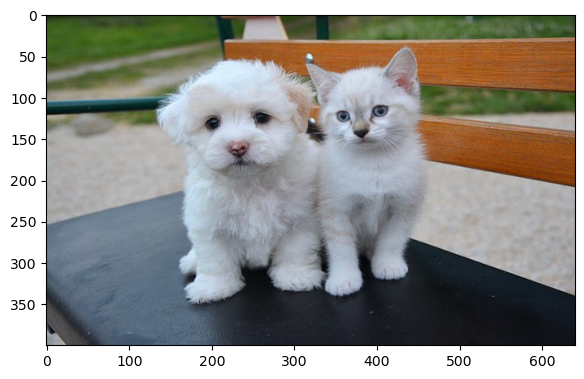

In [4]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_CATDOG)

# Loading the model

In [5]:
!pip install transformers
!pip install timm

In [6]:
from transformers import DetrImageProcessor, DetrForObjectDetection

C:\Users\diabomba\anaconda3\envs\ETH_CAS_AIS_2024\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


# define DETR model

In [7]:
image_processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


# load the object detector model

In [8]:
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Preprocess retrieved image

In [10]:
inputs = image_processor(images = image_CATDOG,
                         return_tensors = "pt")
outputs = model(**inputs)
target_sizes = torch.tensor([image_CATDOG.size[::-1]])

 # define dictionary with identified objects

In [11]:
results = image_processor.post_process_object_detection(outputs,
                                                        target_sizes = target_sizes,
                                                        threshold = 0.9)[0]
results

{'scores': tensor([0.9971, 0.9955, 0.9980], grad_fn=<IndexBackward0>),
 'labels': tensor([15, 18, 17]),
 'boxes': tensor([[-1.6085e-01,  2.6981e+01,  6.3982e+02,  3.9591e+02],
         [ 1.3121e+02,  5.2729e+01,  3.3670e+02,  3.5072e+02],
         [ 3.0931e+02,  3.8568e+01,  4.6358e+02,  3.4174e+02]],
        grad_fn=<IndexBackward0>)}

# draw the bounding boxes
based on the calculated and retrieved predicted values, draw and highlight the objects defined

In [13]:
from PIL import Image, ImageDraw

draw = ImageDraw.Draw(image_CATDOG)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected bench with confidence 0.997 at location [-0.16, 26.98, 639.82, 395.91]
Detected dog with confidence 0.995 at location [131.21, 52.73, 336.7, 350.72]
Detected cat with confidence 0.998 at location [309.31, 38.57, 463.58, 341.74]


In [14]:
draw.rectangle(box, outline="yellow", width=2)

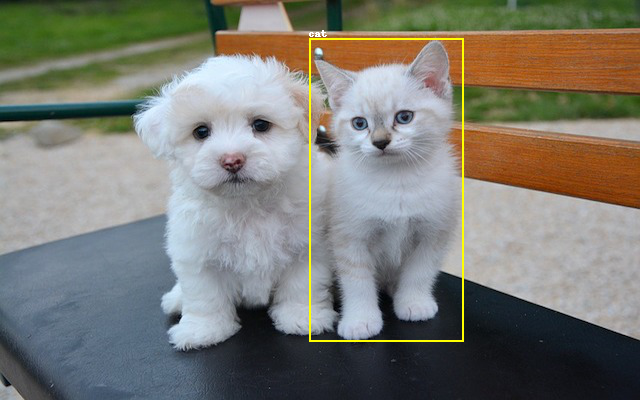

In [15]:
draw.text((box[0], box[1]-10),
          model.config.id2label[label.item()],
          fill="white")

image_CATDOG

In [29]:
draw.rectangle(results["boxes"][0].tolist(), outline="red", width=2)

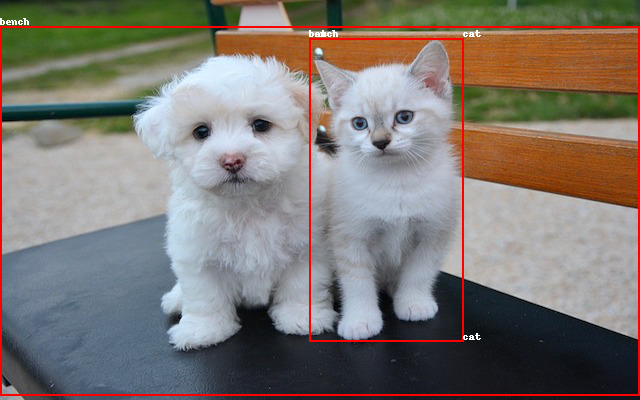

In [30]:
draw.text((results["boxes"][0][0], results["boxes"][0][1]-10),
          model.config.id2label[results["labels"][0].item()],
          fill="white")

image_CATDOG

In [31]:
draw.rectangle(results["boxes"][1].tolist(), outline="green", width=2)

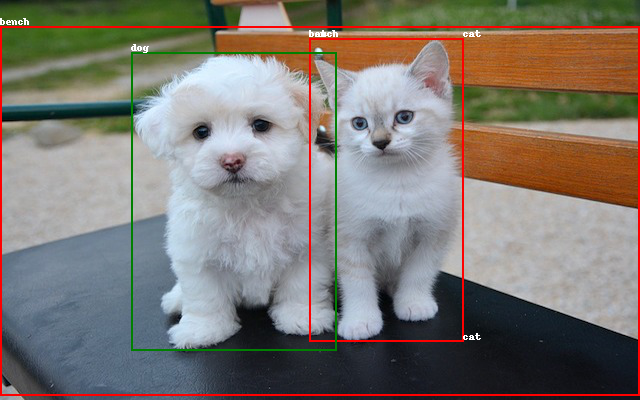

In [32]:
draw.text((results["boxes"][1][0], results["boxes"][1][1]-10),
          model.config.id2label[results["labels"][1].item()],
          fill="white")

image_CATDOG

# Evaluation
we can see that the model can identify 3 different elements (cat, dog, bench) and it can assign the bounding boxes and the labels correctly. Only side can be the bounding box defined for the bench

# Task 2
perform image segmentation on house image

# import modules and load image

In [33]:
!pip install opencv-python
import numpy as np
import cv2
import urllib.request

url_house = 'https://www.bhg.com/thmb/H9VV9JNnKl-H1faFXnPlQfNprYw=/1799x0/filters:no_upscale():strip_icc()/white-modern-house-curved-patio-archway-c0a4a3b3-aa51b24d14d0464ea15d36e05aa85ac9.jpg'
resp = urllib.request.urlopen(url_house)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, -1)

# convert the image on gray scale

In [34]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying and binarize the image
idea is to split the pixels either to 0 or 255, loosing gradient information on purpose

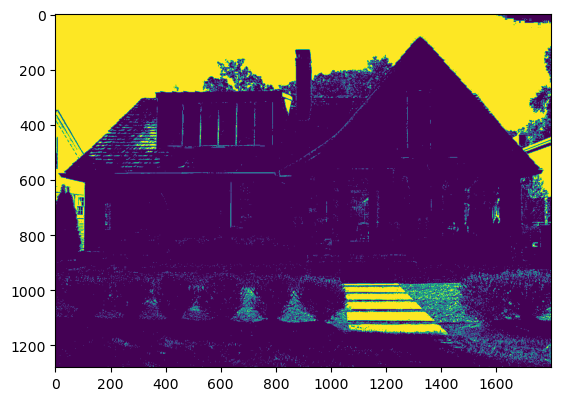

In [48]:
_, thresholded_image = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_image)

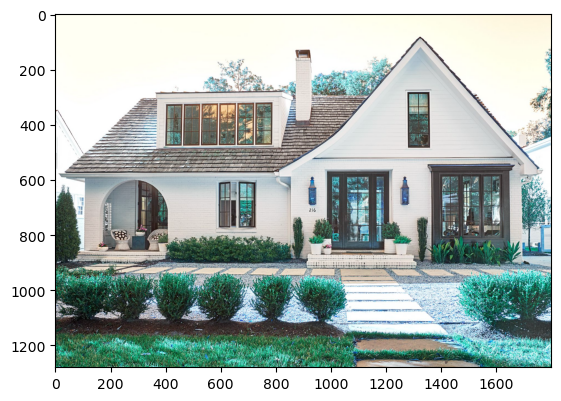

In [36]:
plt.imshow(image)

# apply truncated binarization

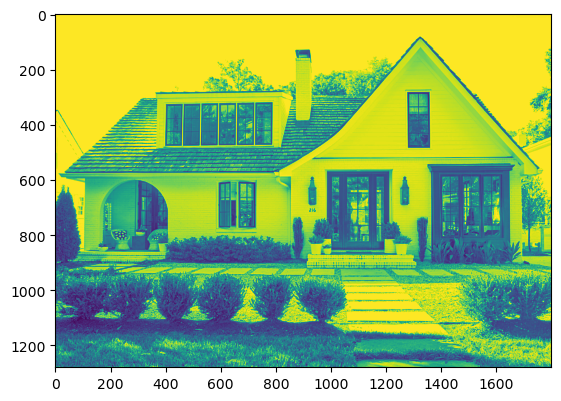

In [49]:
_, thresholded_image_trunc = cv2.threshold(img, 240, 255, cv2.THRESH_TRUNC)
plt.imshow(thresholded_image_trunc)

# Apply toZero binarization

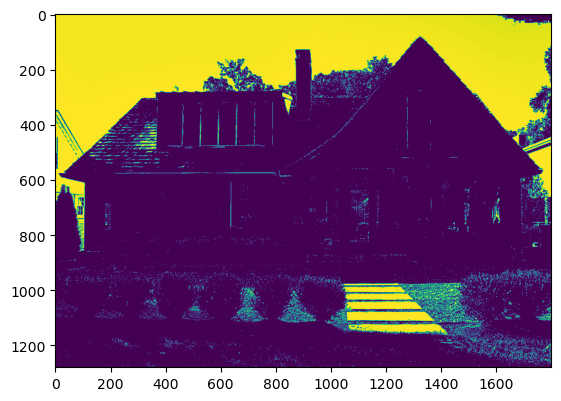

In [50]:
_, thresholded_image_zero = cv2.threshold(img, 240, 255, cv2.THRESH_TOZERO)
plt.imshow(thresholded_image_zero)

In [46]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

(0.0, 256.0)

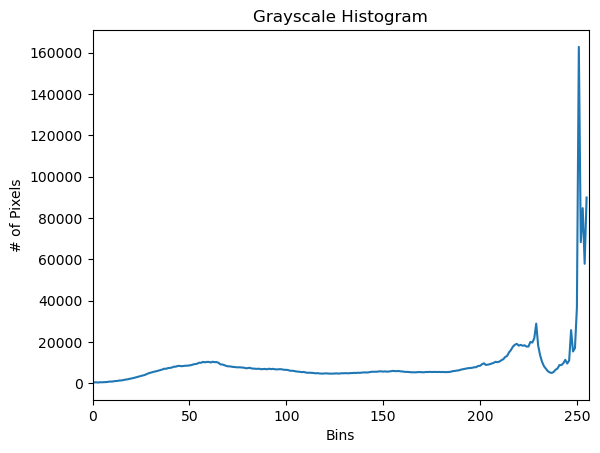

In [47]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

# Task 3
perform image segmentation

# import needed libraries

In [57]:
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import fcn_resnet101, lraspp_mobilenet_v3_large
from PIL import Image
import requests
from matplotlib import pyplot as plt

# Load focus image

In [54]:
human_dog = 'https://cdn.pixabay.com/photo/2017/12/27/14/02/friends-3042751_960_720.jpg'
cat_and_dog = 'https://cdn.pixabay.com/photo/2018/10/01/09/21/pets-3715733_960_720.jpg'

response_first =  requests.get(human_dog)
response_second = requests.get(cat_and_dog)

image_first = Image.open(requests.get(human_dog, stream=True).raw)
image_second = Image.open(requests.get(cat_and_dog, stream=True).raw)

# Transform the images

In [60]:
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor_first = preprocess(image_first)
input_batch_first = input_tensor_first.unsqueeze(0)

# repeat to the second image

preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor_second = preprocess(image_second)
input_batch_second = input_tensor_second.unsqueeze(0)

# Import the models
import the different required 2 models for evaluation on the different images

In [59]:
model_resnet = fcn_resnet101(pretrained=True)
model_resnet.eval()

model_mobilenet = lraspp_mobilenet_v3_large(pretrained=True)
model_mobilenet.eval()

LRASPP(
  (backbone): IntermediateLayerGetter(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1

# Analizing the first image with the 2 models

In [61]:
with torch.no_grad(): 
    output_resnet_first = model_resnet(input_batch_first)['out'][0]
output_pred_resnet_first = output_resnet_first.argmax(0)

In [62]:
with torch.no_grad(): 
    output_mobilenet_first = model_mobilenet(input_batch_first)['out'][0]
output_pred_mobilenet_first = output_mobilenet_first.argmax(0)

# Visualize the results
comparison between 2 models on the first image

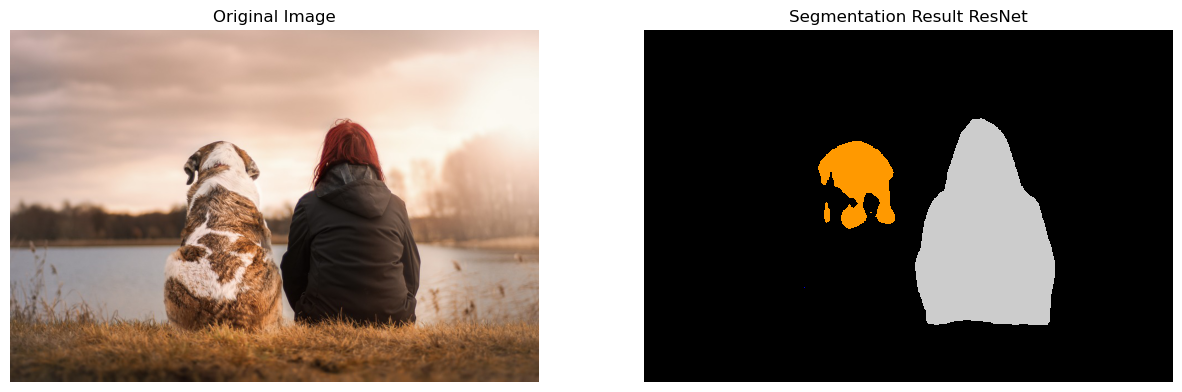

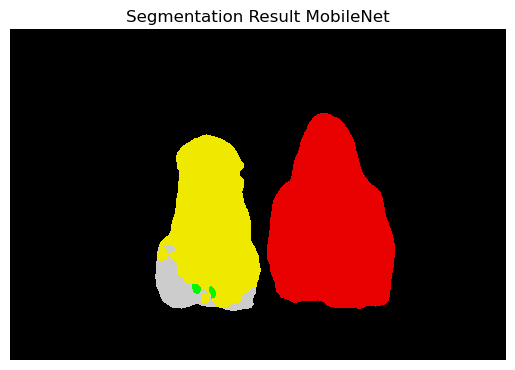

In [72]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_first)
plt.title('Original Image')
plt.axis('off')  # Hide the axis for a cleaner look
plt.subplot(1, 2, 2)
# We use a color map to differentiate the segments identified by the model.
plt.imshow(output_pred_resnet_first.byte().cpu().numpy(), cmap='nipy_spectral', interpolation='nearest')
plt.title('Segmentation Result ResNet')
plt.axis('off')
plt.show()

plt.imshow(output_pred_mobilenet_first.byte().cpu().numpy(), cmap='nipy_spectral', interpolation='nearest')
plt.title('Segmentation Result MobileNet')
plt.axis('off')
plt.show()

# Analizing the second image with the 2 models

In [68]:
with torch.no_grad(): 
    output_resnet_second = model_resnet(input_batch_second)['out'][0]
output_pred_resnet_second = output_resnet_second.argmax(0)

In [69]:
with torch.no_grad(): 
    output_mobilenet_second = model_mobilenet(input_batch_second)['out'][0]
output_pred_mobilenet_second = output_mobilenet_second.argmax(0)

# Visualizing the result
comparing segmentation result of 2 different models on the cat/dog image

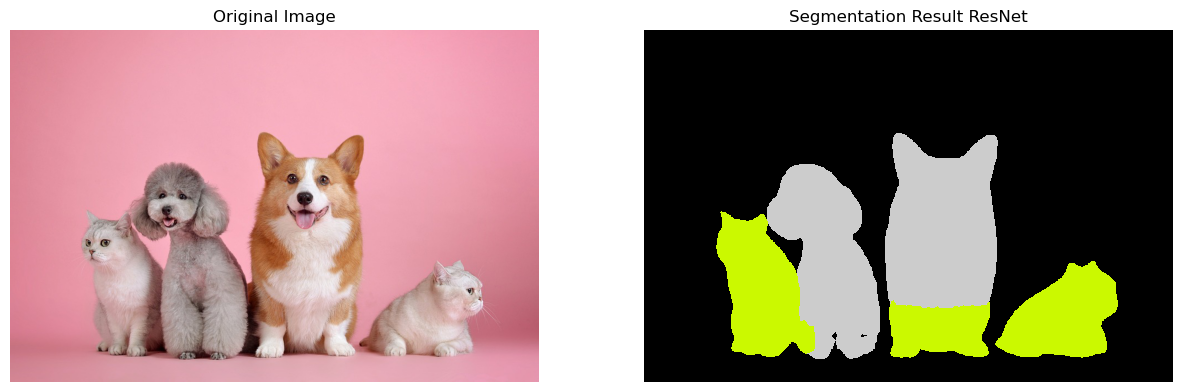

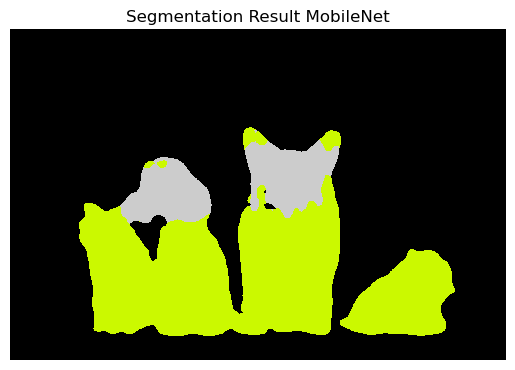

In [71]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_second)
plt.title('Original Image')
plt.axis('off')  # Hide the axis for a cleaner look
plt.subplot(1, 2, 2)
# We use a color map to differentiate the segments identified by the model.
plt.imshow(output_pred_resnet_second.byte().cpu().numpy(), cmap='nipy_spectral', interpolation='nearest')
plt.title('Segmentation Result ResNet')
plt.axis('off')
plt.show()

plt.imshow(output_pred_mobilenet_second.byte().cpu().numpy(), cmap='nipy_spectral', interpolation='nearest')
plt.title('Segmentation Result MobileNet')
plt.axis('off')
plt.show()